# Object Detection with YOLO v3

This notebook uses a [PyTorch port](https://github.com/ayooshkathuria/pytorch-yolo-v3) of [YOLO v3](https://pjreddie.com/darknet/yolo/) to detect objects on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install ayooshkathuria/pytorch-yolo-v3

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/ayooshkathuria/pytorch-yolo-v3.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  #!cd $project_name && pip install -q -r requirement.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download official YOLO v3 pretrained weights

In [0]:
if not exists('yolov3.weights'):
  !wget -q https://pjreddie.com/media/files/yolov3.weights

## Detect objects on a test image

First, dowload a test image from internet:

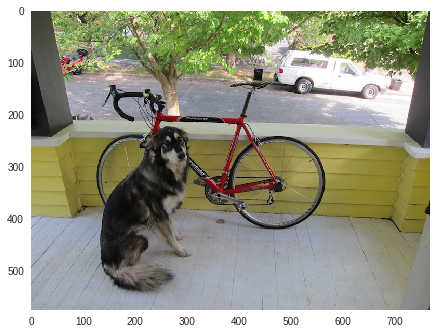

In [3]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/dog.jpg'


image_file = basename(IMAGE_URL)
!wget -q -O $image_file $IMAGE_URL
plt.imshow(matplotlib.image.imread(image_file))

Execute `detect.py` on that image and show the result:

Loading network.....
Network successfully loaded
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
dog.jpg              predicted in  0.123 seconds
Objects Detected:    bicycle truck dog
----------------------------------------------------------

SUMMARY
----------------------------------------------------------
Task                     : Time Taken (in seconds)

Reading addresses        : 0.000
Loading batch            : 0.182
Detection (1 images)     : 0.130
Output Processing        : 0.000
Drawing Boxes            : 0.026
Average time_per_img     : 0.338
----------------------------------------------------------


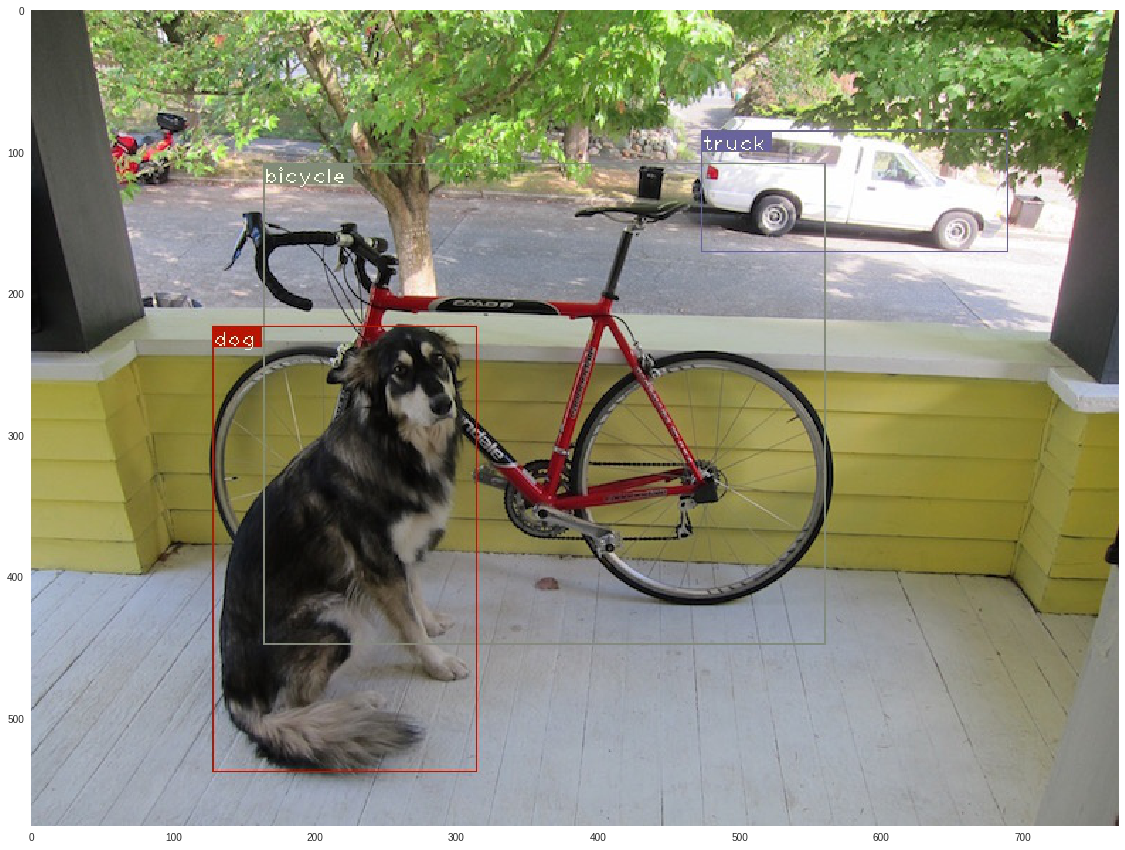

In [4]:
!cd pytorch-yolo-v3 && python detect.py --weights ../yolov3.weights --images ../$image_file --det ..

plt.figure(figsize=(20, 15))
plt.imshow(matplotlib.image.imread('det_%s' % image_file))